In [1]:
import os
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
train_dir = 'Dataset/Training'
test_dir = 'Dataset/Testing'

In [8]:
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']
train_data = []
test_data = []

for label in classes:
    train_images = glob(os.path.join(train_dir, label, '*.jpg'))
    test_images = glob(os.path.join(test_dir, label, '*.jpg'))
    
    # Append the paths and corresponding labels to lists
    train_data.extend([(img_path, label) for img_path in train_images])
    test_data.extend([(img_path, label) for img_path in test_images])

# Convert to DataFrame for easier manipulation
train_df = pd.DataFrame(train_data, columns=['image_path', 'label'])
test_df = pd.DataFrame(test_data, columns=['image_path', 'label'])

C:\Users\Mufti\AppData\Local\Temp\ipykernel_12716\24132501.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='label', palette='Set2')


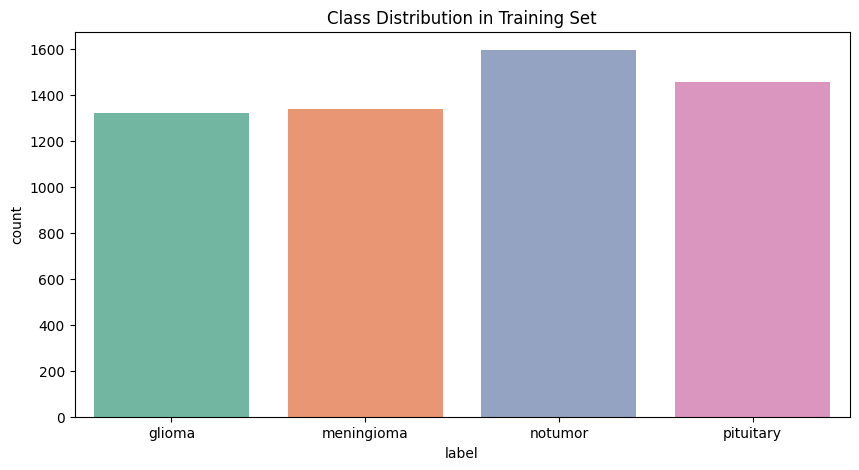

C:\Users\Mufti\AppData\Local\Temp\ipykernel_12716\24132501.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test_df, x='label', palette='Set3')


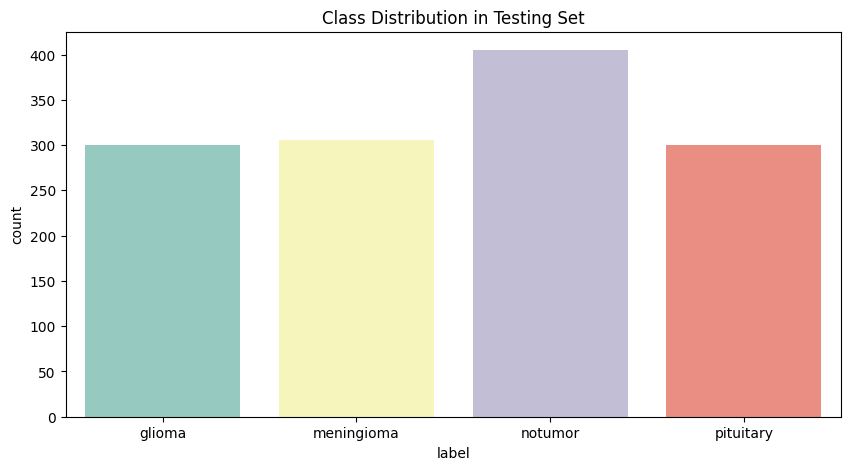

In [10]:
# plot class distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=train_df, x='label', palette='Set2')
plt.title("Class Distribution in Training Set")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=test_df, x='label', palette='Set3')
plt.title("Class Distribution in Testing Set")
plt.show()

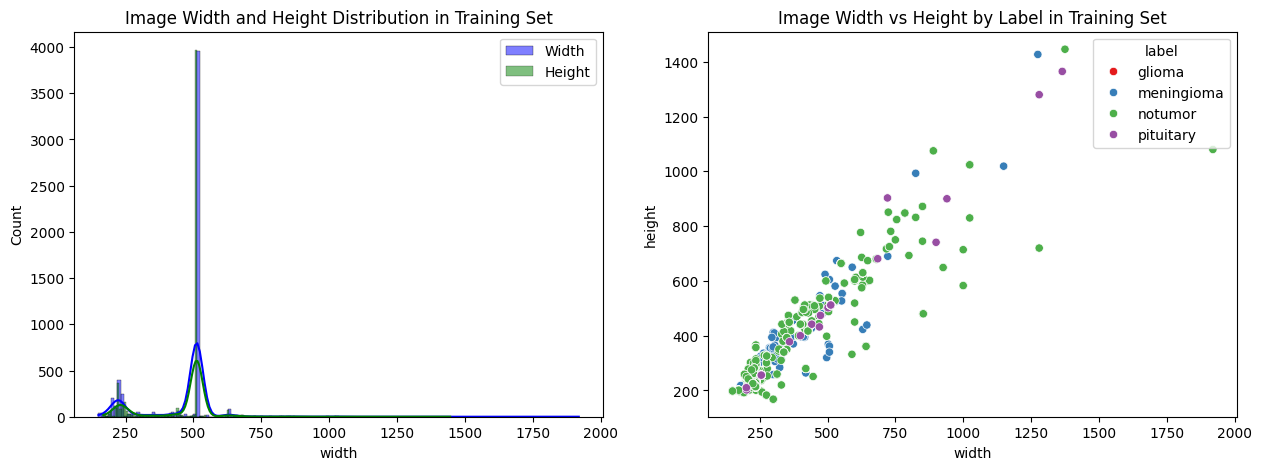

In [11]:
# collect image dimensions
train_df['image_size'] = train_df['image_path'].apply(lambda x: Image.open(x).size)
test_df['image_size'] = test_df['image_path'].apply(lambda x: Image.open(x).size)

# separate width and height
train_df['width'], train_df['height'] = zip(*train_df['image_size'])
test_df['width'], test_df['height'] = zip(*test_df['image_size'])

# distribution of image dimensions
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(train_df['width'], kde=True, ax=ax[0], color="blue", label="Width")
sns.histplot(train_df['height'], kde=True, ax=ax[0], color="green", label="Height")
ax[0].set_title("Image Width and Height Distribution in Training Set")
ax[0].legend()

sns.scatterplot(data=train_df, x="width", y="height", hue="label", ax=ax[1], palette="Set1")
ax[1].set_title("Image Width vs Height by Label in Training Set")
plt.show()

C:\Users\Mufti\AppData\Local\Temp\ipykernel_12716\3917777517.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x="label", y="brightness", palette="Pastel1")


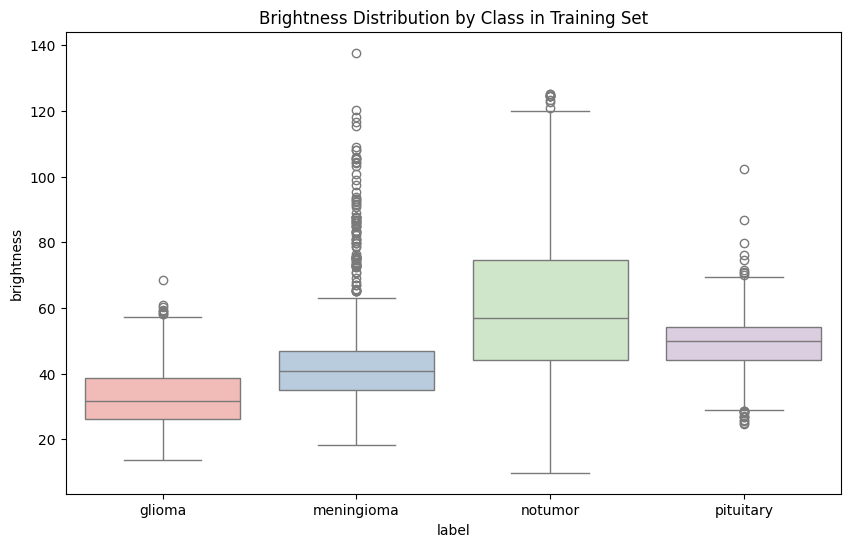

In [12]:
# calculate mean pixel intensity (brightness) for each image
train_df['brightness'] = train_df['image_path'].apply(lambda x: np.array(Image.open(x)).mean())
test_df['brightness'] = test_df['image_path'].apply(lambda x: np.array(Image.open(x)).mean())

# plot the brightness distribution by class
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x="label", y="brightness", palette="Pastel1")
plt.title("Brightness Distribution by Class in Training Set")
plt.show()

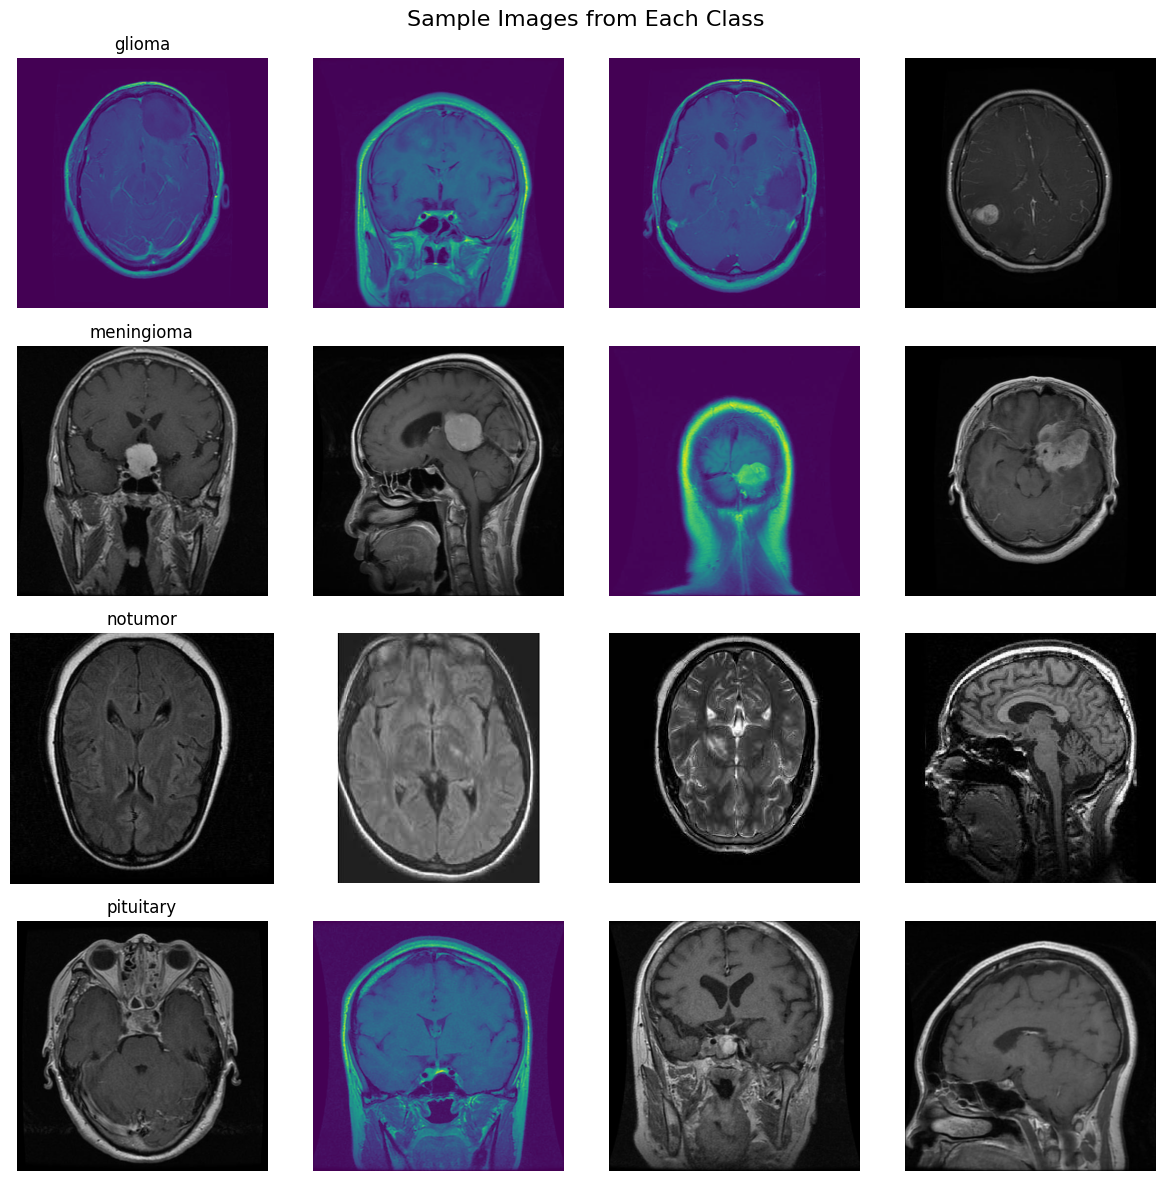

In [9]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
for i, label in enumerate(classes):
    sample_images = train_df[train_df['label'] == label].sample(4)['image_path'].values
    for j, img_path in enumerate(sample_images):
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis("off")
        if j == 0:
            axes[i, j].set_title(label, fontsize=12)
plt.suptitle("Sample Images from Each Class", fontsize=16)
plt.tight_layout()
plt.show()